<a href="https://colab.research.google.com/github/arash-ashra/ashra-slide/blob/main/Ashra_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-pptx

In [2]:
from datetime import datetime
title = 'Neuromatch Academy'
subtile = 'Example Presentation Template'
date = datetime.today().strftime('%B %d, %Y')

content = {
    "Example Slide": {
        "points": ["Economy of Scale"],
        "images": ["price_reduction_volume.png"]
    },
}

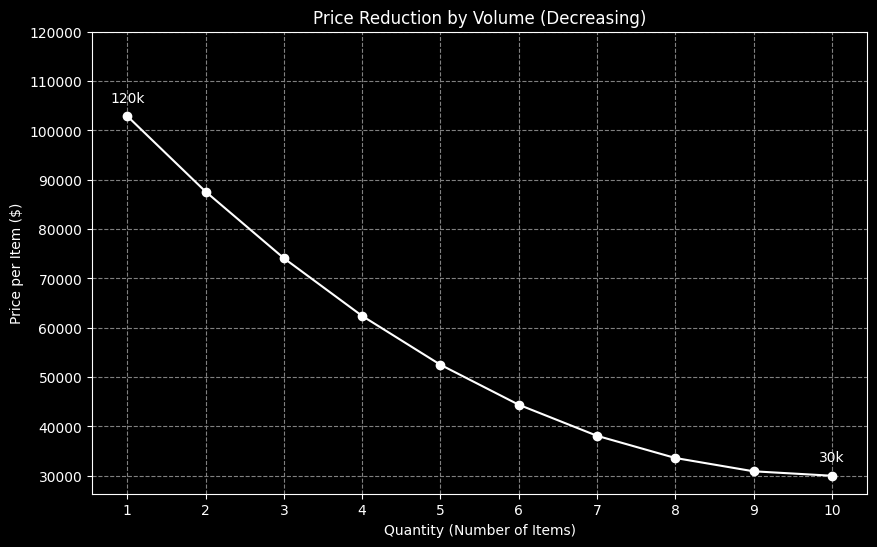

In [3]:
# Example plot
# Setting dark background and plotting the graph with white text
import matplotlib.pyplot as plt
import numpy as np

def decreasing_price_function(x):
    # Coefficients to make the curve a downward opening parabola, minimum at 10 items
    a = 900
    b = -17100
    c = 120000 - (a * 1**2 + b * 1)  # Ensure it starts at 120k for 1 item
    return a * (x - 10) ** 2 + 30000  # Shift the vertex to (10, 30000)

# Generate x values from 1 to 10
x_decreasing = np.arange(1, 11, 1)

# Calculate corresponding y values for decreasing function
y_decreasing = decreasing_price_function(x_decreasing)

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.plot(x_decreasing, y_decreasing, marker='o', linestyle='-', color='white')
plt.title('Price Reduction by Volume (Decreasing)', color='white')
plt.xlabel('Quantity (Number of Items)', color='white')
plt.ylabel('Price per Item ($)', color='white')
plt.grid(True, linestyle='--', color='gray')
plt.xticks(x_decreasing, color='white')
plt.yticks(np.linspace(30000, 120000, 10), color='white')

# Annotate the start and end points with white text
plt.annotate('120k', (x_decreasing[0], y_decreasing[0]), textcoords="offset points", xytext=(0,10), ha='center', color='white')
plt.annotate('30k', (x_decreasing[-1], y_decreasing[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='white')

# Save the dark theme plot
plt.savefig('price_reduction_volume.png', transparent=True)
plt.show()

In [4]:
from pptx.dml.color import RGBColor
from pptx import Presentation
from pptx.util import Inches, Pt

# Define colors
background_color = RGBColor(0x00, 0x00, 0x00)
title_color = RGBColor(0xFF, 0x8C, 0x00)
normal_text_color = RGBColor(0xFF, 0xFF, 0xFF)
highlight_color = RGBColor(0xCC, 0x00, 0xCC)
info_color = RGBColor(0x00, 0xBB, 0xFF)

def add_background(slide, image_path, prs):
    # Get the dimensions of the presentation
    slide_width = prs.slide_width
    slide_height = prs.slide_height

    # Add picture at specified size
    pic = slide.shapes.add_picture(image_path, 0, 0, width=slide_width, height=slide_height)

    # Move the picture to the back of all other shapes
    slide.shapes._spTree.remove(pic._element)
    slide.shapes._spTree.insert(2, pic._element)

def add_image(slide, img_path, prs, margin):
    img = slide.shapes.add_picture(img_path, 0, 0)
    img_width = prs.slide_width / 2
    img_ratio = img.width / img.height
    img_height = img_width / img_ratio
    img.width = int(img_width)
    img.height = int(img_height)
    img.left = int(prs.slide_width - img.width - margin)  # Align right with margin
    img.top = int(prs.slide_height - img.height - margin)  # Align bottom with margin


def add_slide(prs, slide_type, title_text, subtitle_text=None, date_text=None, points=None, images=None, is_outline=False, section_number=1, total_sections=None, highlight_index=None):
    margin = Inches(1)
    margin_top = Inches(1)
    margin_left = Inches(1)
    margin_bottom = prs.slide_height - margin_top - Inches(0.5)

    slide_layout = prs.slide_layouts[6]  # Blank slide layout
    slide = prs.slides.add_slide(slide_layout)
    slide.background.fill.solid()
    slide.background.fill.fore_color.rgb = background_color

    # # Set your background before adding other content
    # add_background(slide, "background.jpg", prs)

    # Title
    title_box = slide.shapes.add_textbox(margin_left, margin_top, Inches(11.33), Inches(1))
    title_frame = title_box.text_frame
    title_frame.clear()
    title_p = title_frame.add_paragraph()
    title_p.text = title_text
    title_p.font.color.rgb = title_color
    title_p.font.size = Pt(48)
    title_p.font.name = 'Marmelad'

    if slide_type == "cover":
        if subtitle_text:
            subtitle_box = slide.shapes.add_textbox(margin_left, Inches(2), Inches(11.33), Inches(1))
            subtitle_frame = subtitle_box.text_frame
            subtitle_frame.clear()
            subtitle_p = subtitle_frame.add_paragraph()
            subtitle_p.text = subtitle_text
            subtitle_p.font.color.rgb = highlight_color
            subtitle_p.font.size = Pt(36)
            subtitle_p.font.name = 'Marmelad'
        if date_text:
            date_box = slide.shapes.add_textbox(margin_left, margin_bottom, Inches(3), Inches(0.5))
            date_frame = date_box.text_frame
            date_frame.clear()
            date_p = date_frame.add_paragraph()
            date_p.text = date_text
            date_p.font.color.rgb = info_color
            date_p.font.size = Pt(24)
            date_p.font.name = 'Marmelad'
    else:
        content_box = slide.shapes.add_textbox(margin_left, Inches(2), Inches(11.33), Inches(5))
        content_frame = content_box.text_frame
        content_frame.clear()
        for index, content_point in enumerate(points):
            p = content_frame.add_paragraph()
            p.text = content_point
            p.level = 0
            p.space_before = Pt(6)
            p.space_after = Pt(3)
            p.font.size = Pt(24)
            p.font.name = 'Marmelad'
            p.font.color.rgb = highlight_color if index == highlight_index else normal_text_color


    if slide_type != "cover":
        footer_text = f"{section_number}/{total_sections}" if total_sections else str(section_number)
        footer_box = slide.shapes.add_textbox(margin_left, margin_bottom, Inches(2), Inches(0.5))
        footer_frame = footer_box.text_frame
        footer_frame.clear()
        footer_p = footer_frame.add_paragraph()
        footer_p.text = footer_text
        footer_p.font.color.rgb = info_color
        footer_p.font.size = Pt(20)
        footer_p.font.name = 'Marmelad'

    if images:
        # Add Images to the right side of the slide
        add_image(slide, images[highlight_index], prs, margin)

In [5]:
# Main function
prs = Presentation()
prs.slide_width = Inches(13.33)
prs.slide_height = Inches(7.5)

# Add cover slide
add_slide(prs, "cover", title, subtitle_text=subtile, date_text=date)

total_sections = len(content) + 1
outline_titles = list(content.keys())

# Create slides for the outline
for index, title in enumerate(outline_titles):
    add_slide(prs, "bullet_points", "Outline of Presentation", points=outline_titles, highlight_index=index, section_number=1, total_sections=total_sections)

section_number = 2  # Start section numbering from 2 as the outline is 1
for title, content in content.items():
    for index, point in enumerate(content["points"]):
        add_slide(prs, "bullet_points", title, points=content["points"], images=content["images"], section_number=section_number, total_sections=total_sections, highlight_index=index)
    section_number += 1  # Increment section number after all points of a section are covered

prs.save("ASHRA_Presentation.pptx")